In [1]:
import skimage
import numpy as np
from collections import OrderedDict
import NanowireImageSegmentation as nim
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from scipy import ndimage
import importlib as il
from shapely.geometry import LineString, MultiLineString, Point, GeometryCollection
from shapely import ops
import networkx as nx
from copy import deepcopy
import pickle
import NanowireMesh as nwm

In [2]:
def plot_imgs(imgs, colorbar = False):
	fig, axs = plt.subplots(
		nrows = (rows := round(len(imgs)/2 + 0.1)),
		ncols = 2,
		figsize = (14, 7 * rows)
	)
	for n, (title, img) in enumerate(imgs.items()):
		ax = axs.flatten()[n]
		ax.set_title('{}'.format(title))
		plot = ax.imshow(
			img,
			cmap = 'hot'
		)
		if colorbar:
			cbar = fig.colorbar(
				plot,
				ax = ax
			)
			cbar.minorticks_on()

	plt.show()


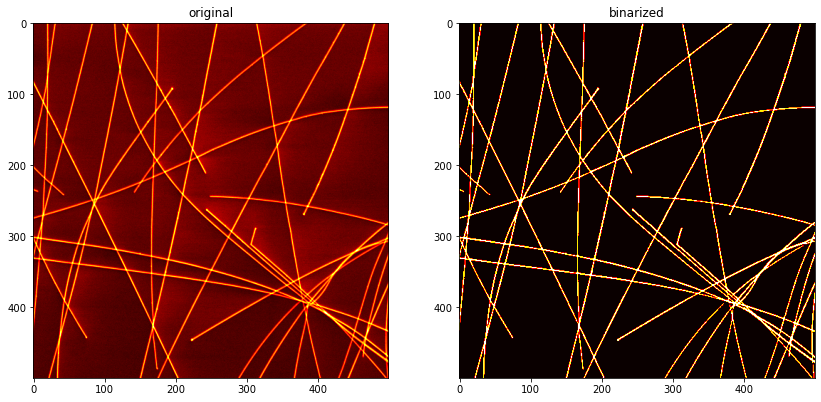

In [3]:
img = skimage.io.imread('/Users/adamtrebach/Documents/Research/TPV/Nanowires/sample_nw_images/301.tif')
# cropping
img = img[:500,:500]
results = OrderedDict(original = img)
binarization_threshold = skimage.filters.threshold_minimum(img)
img = np.where(
	img > binarization_threshold,
	1,
	0
)
results['binarized'] = img
plot_imgs(results)
skimage.io.imsave('/Users/adamtrebach/Documents/Research/TPV/Nanowires/sample_nw_images/301_cropped_500x500.tif', results['original'])

In [4]:
#profiles = nim.parallel_distance_profile(
#	results['binarized'],
#	angle_samples = 90,
#	num_cpus = 8,
#	order = 2
#)
il.reload(nim)
profiles = nim.distance_profile(
	results['binarized'],
	angle_samples = 90,
	num_cpus = 8,
	order = 2
)

  0%|          | 0/17646 [00:00<?, ?it/s]

## To save the pickle

In [ ]:
with open('/Users/adamtrebach/Documents/Research/TPV/Nanowires/sample_nw_images/301_cropped_500x500_angle_profiles.pickle', 'wb') as profiles_file:
	pickle.dump(profiles, profiles_file)

## To load the pickle

In [11]:
# with open('/Users/adamtrebach/Documents/Research/TPV/Nanowires/sample_nw_images/301_cropped_angle_profiles.pickle', 'rb') as profiles_file:
# 	pickle_data = pickle.load(profiles_file)
# 	profiles = pickle_data['profiles']
# 	binarized = pickle_data['img']

In [45]:
','.join(['1','2'])

'1,2'

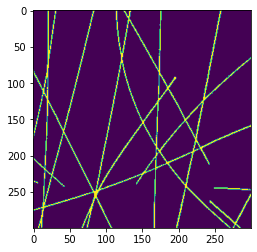

In [47]:
plt.imshow(imgs[list(imgs.keys())[0]])

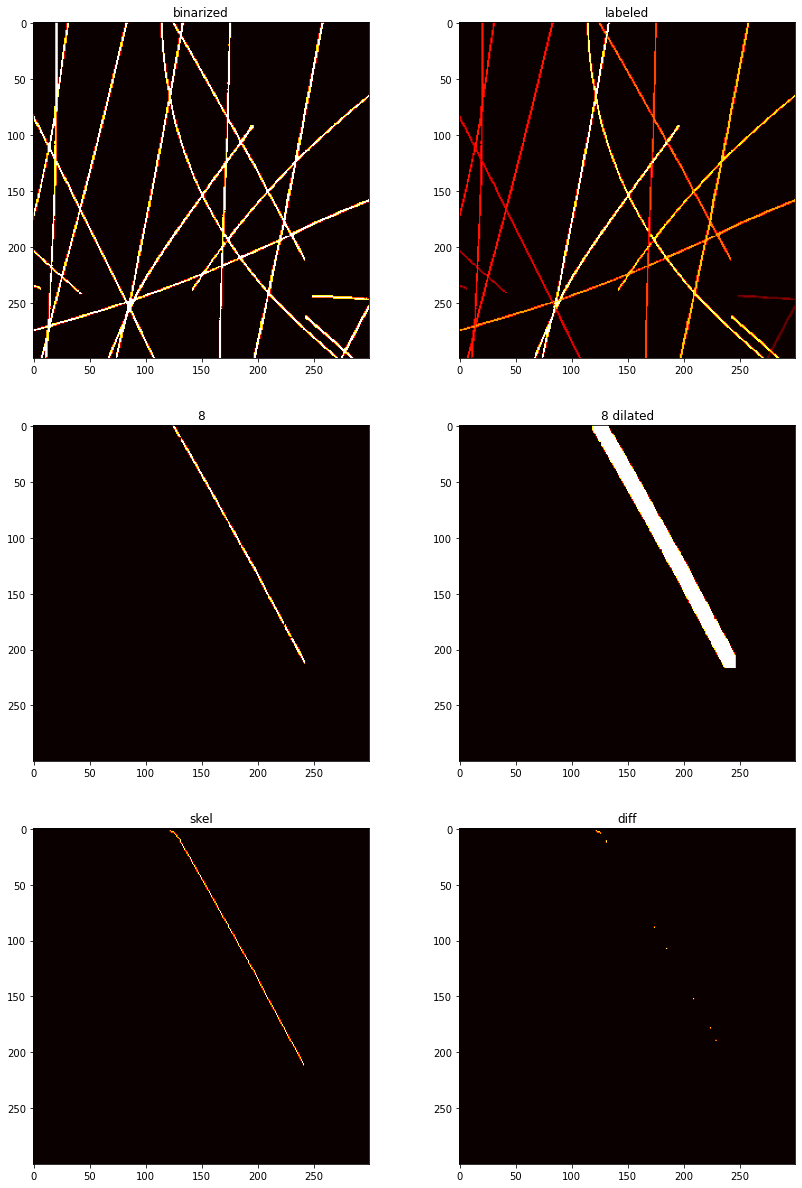

In [32]:
il.reload(nim)
imgs = dict(binarized = binarized)

data = nim.profiles_to_data_array(profiles)
labels = nim.cluster_data_array(data)
imgs['labeled'] = nim.labeled_img(
	img = binarized,
	data = data,
	labels = labels
)

imgs[8] = imgs['labeled'] == 8
imgs['8 dilated'] = skimage.morphology.binary_dilation(
	image = imgs[8],
	footprint = np.ones((10,10))
)
imgs['skel'] = skimage.morphology.skeletonize(image = imgs['8 dilated'])

imgs['diff'] = np.logical_and(imgs['skel'], np.logical_not(imgs[8]))


plot_imgs(imgs)

In [42]:
class pp(object):
	def __init__()

In [43]:
test(1,2,3,4)

(1, 2, 3, 4)

In [10]:
# for testing different clustering
il.reload(nim)
def profiles_to_array(profiles):
	data = []
	for key in profiles.keys():
		max_idx = np.argmax(profiles[key][:,1])
		peak_angle = profiles[key][max_idx,0]
		data.append((key[0], key[1], peak_angle / (2 * np.pi) * 360))
	return np.array(data)

def cluster_to_image(data, labels):
	img = np.zeros(
		(int(data[:,0].max())+1, int(data[:,1].max())+1)
	)
	for n in range(len(data)):
		row = int(data[n,0])
		col = int(data[n,1])
		img[row,col] = labels[n]
	return img	

imgs = dict(original = results['binarized'])

clusterer = HDBSCAN(min_cluster_size = 20, min_samples = 5)
data = profiles_to_array(profiles)
labels = clusterer.fit_predict(data)

imgs['first clustering'] = cluster_to_image(data, labels)
imgs['first noise'] = cluster_to_image(data,labels) == -1
for n in sorted(np.unique(imgs['first clustering'])):
	if n<= 0:
		continue
	imgs['first {}'.format(n)] = np.where(
		imgs['first clustering'] == n,
		2,
		(imgs['first clustering'] > 0 ) * 1
	)

imgs['dilated'] = skimage.morphology.binary_dilation(
	imgs['original'],
	footprint = np.ones((3,3))
)
# new_profiles = nim.parallel_distance_profile(
# 	imgs['dilated']*1,
# 	angle_samples = 90,
# 	mask = imgs['first clustering'] < 0,
# 	num_cpus = 8,
# 	order = 2
# )

# updated_profiles = deepcopy(profiles)
# updated_profiles.update(new_profiles)
# updated_data = profiles_to_array(updated_profiles)
# updated_labels = clusterer.fit_predict(updated_data)
# imgs['second clustering'] = cluster_to_image(updated_data, updated_labels)
# imgs['second noise'] = imgs['second clustering'] == -1
# for n in sorted(np.unique(imgs['second clustering'])):
# 	if n<= 0:
# 		continue
# 	imgs['second {}'.format(n)] = np.where(
# 		imgs['second clustering'] == n,
# 		2,
# 		(imgs['second clustering'] > 0 ) * 1
# 	)

plot_imgs(imgs,colorbar = True)


NameError: name 'results' is not defined

In [169]:
img = np.zeros((300,300))
profiles_img = np.empty(img.shape)
for (row,col), prof in profiles.items():
	row = int(row)
	col = int(col)
	angles = prof[:,0]
	distances = prof[:,0]
	peak_distance_idx = np.argmax(distances)
	profiles_img[row,col] = angles[peak_distance_idx]

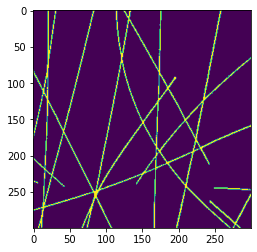

In [170]:
plt.imshow(profiles_img)

In [172]:
profiles_img 

array([[3.14159265, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
il.reload(nim)
il.reload(nwm)
g = nim.profiles_to_graph(
	profiles = profiles,
	clusterer = HDBSCAN(min_cluster_size = 20, min_samples = 5),
	shape = results['binarized'].shape,
	virtual_electrodes = True,
	nwDiam = 0.15,
	initialTemp = 298.15
)
h = nwm.NanowireMesh(
	makeEmpty = False,
	inGraph = g
)

Adding internal resistance


100%|██████████| 19/19 [00:00<00:00, 943.25it/s]

Finding percolating cluster.
Percolating cluster found.
Checking that all node names are integers.
Runtime: 0.02


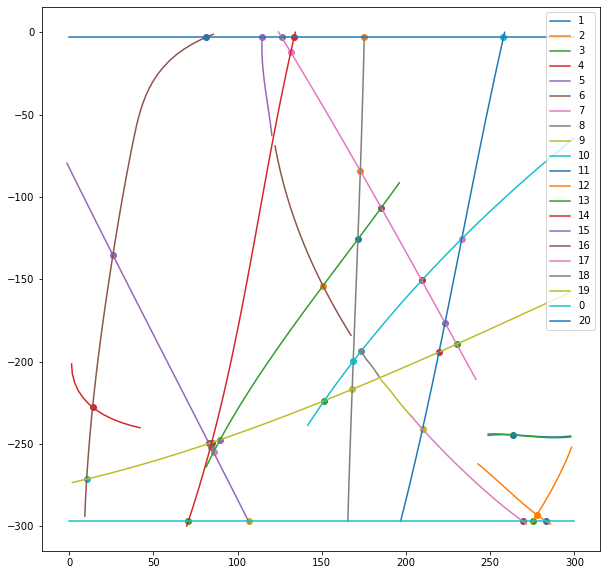

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
for node in g:
	l = g.nodes[node]['obj']
	x,y = [[c[n] for c in l.coords] for n in [0,1]]
	ax.plot(x,y, label = node)# linewidth = 5)
for edge in g.edges:
	x,y = g.edges[edge]['obj'].coords[0]
	ax.scatter(x,y)

ax.legend()

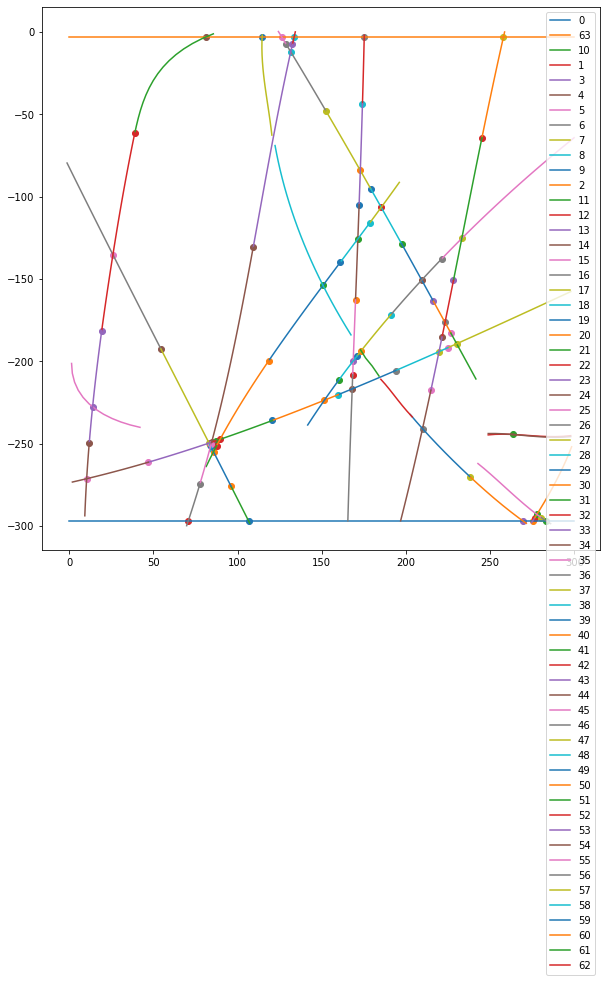

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
for node in h:
	l = h.nodes[node]['obj']
	x,y = [[c[n] for c in l.coords] for n in [0,1]]
	ax.plot(x,y, label = node)# linewidth = 5)
for edge in h.edges:
	x,y = h.edges[edge]['x'], h.edges[edge]['y']
	ax.scatter(x,y)

ax.legend()

### for demo for potential advisors

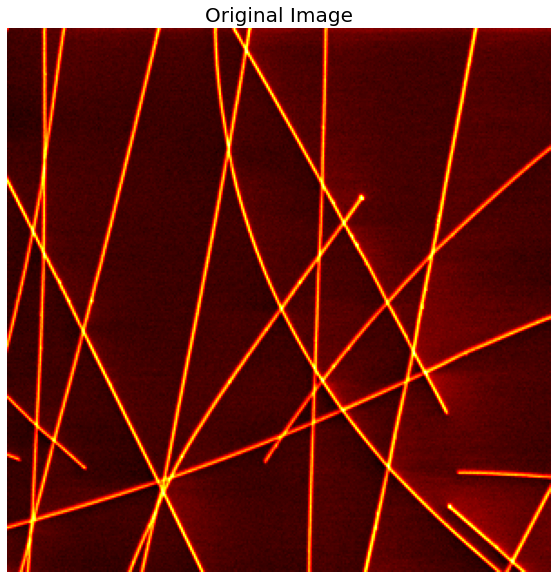

In [78]:
fig,ax = plt.subplots(
	figsize = (10,10)
)
ax.imshow(
	results['original'],
	cmap = 'hot'
)
ax.set_axis_off()
ax.set_title('Original Image', fontsize = 20)
plt.savefig(
	'real_network_demo_original_image.png',
	dpi = 200
)
plt.show()

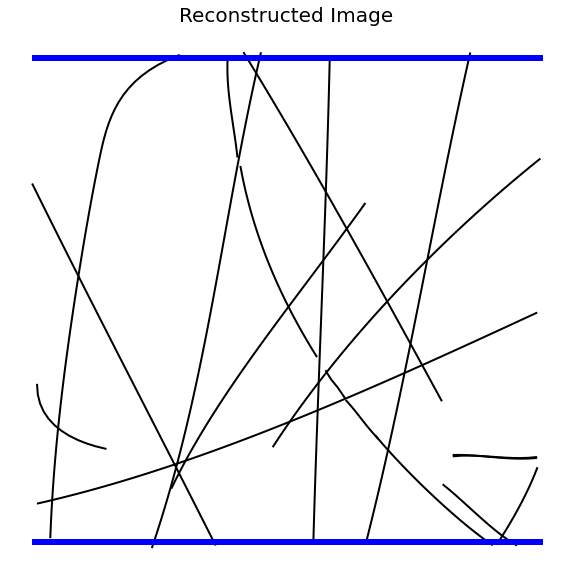

In [79]:
fig, ax = plt.subplots(
	figsize = (10,10)
)
for node in g:
	if node in [g.topElectrode, g.bottomElectrode]:
		kwargs = dict(
			linewidth = 6,
			color = 'blue'
		)
	else:
		kwargs = dict(
			linewidth = 2,
			color = 'black'
		)
	coords = np.array(g.nodes[node]['obj'].coords)
	ax.plot(coords[:,0], coords[:,1], **kwargs)

ax.set_axis_off()
ax.set_title('Reconstructed Image', fontsize = 20)
plt.savefig(
	'real_network_demo_reconstructed_image.png',
	dpi = 200
)
plt.show()

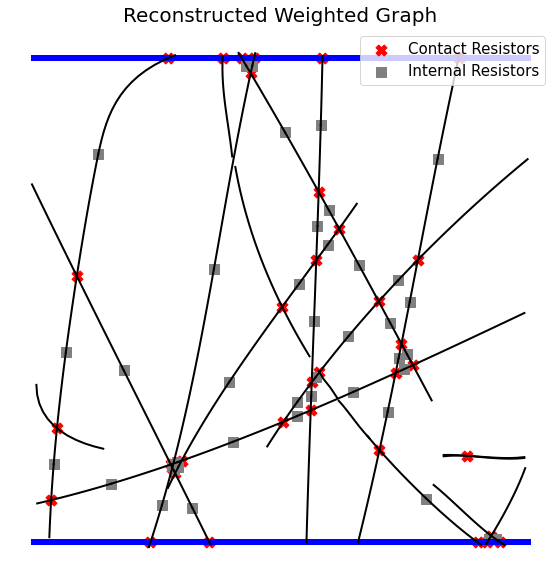

In [83]:
fig, ax = plt.subplots(
	figsize = (10,10)
)
for node in h:
	if node in [h.topElectrode, h.bottomElectrode]:
		kwargs = dict(
			linewidth = 6,
			color = 'blue'
		)
	else:
		kwargs = dict(
			linewidth = 2,
			color = 'black'
		)
	coords = np.array(h.nodes[node]['obj'].coords)
	ax.plot(coords[:,0], coords[:,1], **kwargs)

contact_resistors = np.array([(h.edges[edge]['x'], h.edges[edge]['y']) for edge in h.edges if h.edges[edge]['resistanceType'] == 'cont'])
internal_resistors = np.array([(h.edges[edge]['x'], h.edges[edge]['y']) for edge in h.edges if h.edges[edge]['resistanceType'] == 'int'])

ax.scatter(
	contact_resistors[:,0],
	contact_resistors[:,1],
	marker = 'X',
	s = 120,
	c = 'red',
	label = 'Contact Resistors'
)

ax.scatter(
	internal_resistors[:,0],
	internal_resistors[:,1],
	marker = 's',
	s = 100,
	c = 'gray',
	label = 'Internal Resistors'
)
plt.legend(fontsize = 15)

ax.set_axis_off()
ax.set_title('Reconstructed Weighted Graph',fontsize = 20)
ax.set_aspect('equal')
plt.savefig(
	'real_network_demo_reconstructed_weighted_graph.png',
	dpi = 200
)
plt.show()

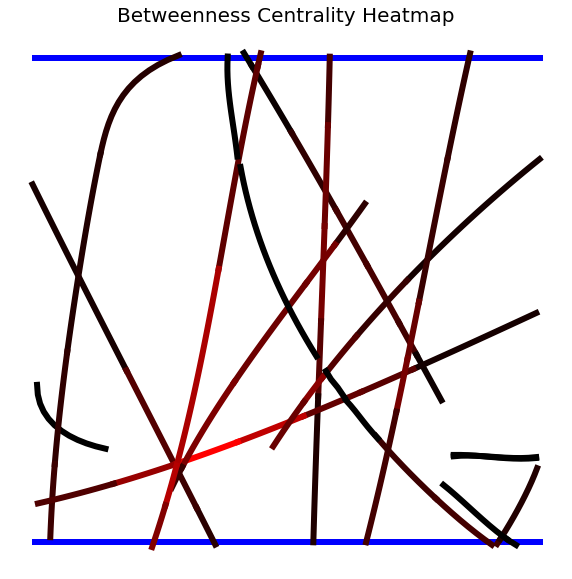

In [81]:
fig, ax = plt.subplots(
	figsize = (10,10)
)
from matplotlib.colors import LinearSegmentedColormap

bc = nx.betweenness_centrality(h, weight = 'resistance')
max_bc = max(bc.values())
c = {node : (bc[node]/max_bc,0,0) for node in bc.keys()}
for node in h:
	if node in [h.topElectrode, h.bottomElectrode]:
		kwargs = dict(
			linewidth = 6,
			color = 'blue'
		)
	else:
		kwargs = dict(
			linewidth = 6,
			color = c[node]
		)
	coords = np.array(h.nodes[node]['obj'].coords)
	ax.plot(coords[:,0], coords[:,1], **kwargs)

ax.set_axis_off()
ax.set_title('Betweenness Centrality Heatmap', fontsize = 20)
plt.savefig(
	'real_network_demo_bc_heatmap.png',
	dpi = 200
)
plt.show()

In [82]:
[edge for edge in h.edges if h.edges[edge]['resistanceType'] == 'int']

[(10, 9),
 (3, 2),
 (6, 7),
 (7, 8),
 (8, 9),
 (11, 12),
 (12, 13),
 (13, 14),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (27, 28),
 (28, 29),
 (29, 30),
 (30, 31),
 (31, 32),
 (32, 33),
 (33, 34),
 (35, 36),
 (36, 37),
 (37, 38),
 (38, 39),
 (40, 41),
 (41, 42),
 (42, 43),
 (43, 44),
 (45, 46),
 (47, 48),
 (48, 49),
 (49, 50),
 (50, 51),
 (52, 53),
 (53, 54),
 (54, 55),
 (55, 56),
 (59, 60)]